# **Quantum Zeno Effect and Bomb-Test**

            Vivek velivela
            12704286

# Definition of Quantum Zeno effect
We all might have heard a saying "A watched pot never boils..". Well in normal world it doesnt matter but in quantum world watching it several times might make a difference. Consider energy levels of an atom where the atom jumps from higher energy levels to lower energy levels emitting light in a process called spontaneous emission.

DOES THE ACT OF MEASUREMENT CHANGES THE ATOM'S DECAY PROCESS?   **Yes it does.**
 
**QUANTUM ZENO EFFECT:** The process of slowing down the decay process by frequent measurements is called ZENO EFFECT.

This decreases the probability that an atom might jump to a lower level. Each time we measure the atom state, we collapse the atom wavefunction whcih results in staying in the intial state. As we measured more frequent the atom might not transition into lower level.





# Quantum Zeno effect (QZE)
Quantum Zeno effect(QZE) says that performing repeated measurements on an unstable quantum system can slow down the quantum mechanical evolution of the system. Many observations have been made practically many successful attempts have been reported while the first attempt was to observe QZE in a two level system with Rabi-driven oscillation(Rabi is cyclic behaviour of two level system with two possible energy levels which are ground and excited state).

The simplest example to explain QZE would be two level system.
Consider a two level system with rabi oscialltion caused by generic Hamiltonian of the form   
$\hat{H} = \Omega(|0\rangle \langle 1 | + |1\rangle\langle 0 |)$ 

where $\Omega$ is time independent constant. H changes the state of the qubit from$ |0\rangle$ to $|1\rangle $ to and vice versa. 

then $H |0\rangle  = \Omega|1\rangle$ and $H |1\rangle  = \Omega|0\rangle$. The time evolution operator from this hamiltonian will be 


$\hat{U} = e^{-i\hat{H}t} = \begin{pmatrix}
cos(\Omega t) & -isin(\Omega t)\\
-isin(\Omega t) & cos(\Omega t)\\
\end{pmatrix}$ ---------[1]


Assume $\hat{U}$ acting on initial state will result in a superposition
$\hat{U}|0 \rangle = cos(\Omega t)|0 \rangle-isin(\Omega t)|1 \rangle $     ----------------[2]

From Equation 2 the probability of state 0 after some time t is $cos^2(\Omega t)$

$P_s = cos^2(\Omega t) = 1/2(1+cos(2\Omega t))$---------[3]

$P_s = Survival Probability$


After expanding [3] according to taylor series and neglecting higher order terms by considering t to be small we obtain

$P_s = 1-\Omega^2 t^2 $  

Now if we divide t to 'n' intervals and 'measure' after each interval then after $n^th$ interval measurement  

  $P_s = (1-\Omega^2 (t/n)^2)^n$ 
  
  considering  $t/n$ to be very small compared to 1. 
  
   $P_s = 1-\Omega^2 t^2/n$ --------[4]

Equation clearly shows that the $P_S$ increases with number of intervals or the number of intermediate measurements"n" and with increasing value of n the survival probability tends towards unity.





**SETTING UP THE BASIC CIRCUIT**

Implementing the above theoritical formulation on a simulator the intial task is to prepare the initial state and unitary time evolution operator. We use U3 gate with $\theta = 2\Omega t, \phi = -\pi/2$ and $\lambda = \pi/2 $ as per our requirement of Eq[1] which makes U3 = $\hat{U}$.




In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
import qiskit
from qiskit import IBMQ
IBMQ.save_account('6d2301079c7eca3a77aebb3356532d471f07dcc2a9536ed076339c4d8e5c0968bbc32bee4caf4b63142341140bd44ef9af71872e2496d766f2748d596c744839')
qiskit.__qiskit_version__
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

     |████████████████████████████████| 8.3MB 2.5MB/s 
     |████████████████████████████████| 16.5MB 207kB/s 
     |████████████████████████████████| 174kB 46.5MB/s 
     |████████████████████████████████| 174kB 45.7MB/s 
     |████████████████████████████████| 1.9MB 43.1MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 5.8MB 37.5MB/s 
     |████████████████████████████████| 1.1MB 44.3MB/s 
     |████████████████████████████████| 296kB 40.6MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 583kB 37.2MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 2.6MB 39.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.21.0-cp36-none-any.whl size=2875 sha256=bb71bc4c7a136eb906407be3e5f84f5ccc7eb90426f8e0d649932c3e1761953d
  Stored in directory: /root/.cache/pip/wheels/f3/b7/87/cdde69a6f1be1a7d01c751eaae325e306e147d3a2e1a738b44
  Created wheel for 

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
#create a quantum register
qreg_q = QuantumRegister(5, 'q')
#create a classical register
creg_c = ClassicalRegister(5, 'c')
#Assign a circuit with classical and quantum bits
circuit = QuantumCircuit(qreg_q, creg_c)
#add U3 gate with parameters
circuit.u3(pi/2, -pi/2, pi/2, qreg_q[0])
#Measure the circuit
circuit.measure(qreg_q[0], creg_c[0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00000 and 00001 are:",counts)

# Draw the circuit
circuit.draw()
# Draw the circuit
circuit.draw()


Total count for 00000 and 00001 are: {'00000': 5006, '00001': 4994}


┌─────────────────────┐┌─┐
q_0: ┤ U3(pi/2,-pi/2,pi/2) ├┤M├
     └─────────────────────┘└╥┘
q_1: ────────────────────────╫─
                             ║ 
q_2: ────────────────────────╫─
                             ║ 
q_3: ────────────────────────╫─
                             ║ 
q_4: ────────────────────────╫─
                             ║ 
c: 5/════════════════════════╩═
                             0

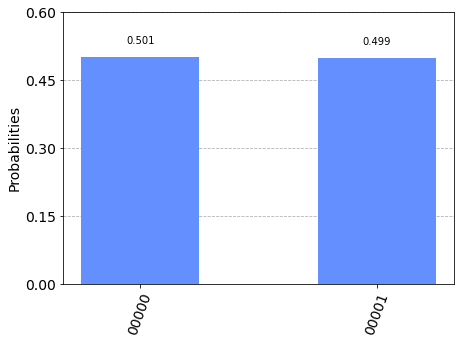

In [ ]:
plot_histogram(counts)

# Adding intermediate measurements or disturbance

The definition of measurement and intermediate disturbance is debated in many literatures. to avoid being confused we can interpret these intermediate measurements as deferred and implicit measurement which conveys that if we leave some quantum
wires untouched we can assume they are measured. Based on this principle, we can treat each intermediate CNOT gate as a valid intermediate measurement and
thus it is these intermediate CNOT gates which causes
the increase in the survival probability.

In [ ]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(pi/4, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.u3(pi/4, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00000 and 00001 are:",counts)

# Draw the circuit
circuit.draw()
# Draw the circuit
circuit.draw()


Total count for 00000 and 00001 are: {'00000': 7536, '00001': 2464}


┌─────────────────────┐     ┌─────────────────────┐     ┌─┐
q_0: ┤ U3(pi/4,-pi/2,pi/2) ├──■──┤ U3(pi/4,-pi/2,pi/2) ├──■──┤M├
     └─────────────────────┘┌─┴─┐└─────────────────────┘  │  └╥┘
q_1: ───────────────────────┤ X ├─────────────────────────┼───╫─
                            └───┘                       ┌─┴─┐ ║ 
q_2: ───────────────────────────────────────────────────┤ X ├─╫─
                                                        └───┘ ║ 
q_3: ─────────────────────────────────────────────────────────╫─
                                                              ║ 
q_4: ─────────────────────────────────────────────────────────╫─
                                                              ║ 
c: 5/═════════════════════════════════════════════════════════╩═
                                                              0

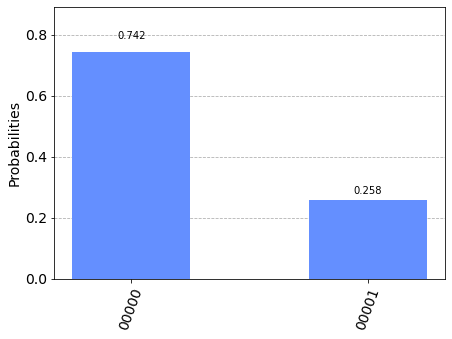

In [ ]:
plot_histogram(counts)

# Adding more measurements or intermediate disturbances

In [ ]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(pi/8, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.u3(pi/8, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.u3(pi/8, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.u3(pi/8, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00000 and 00001 are:",counts)

# Draw the circuit
circuit.draw()
# Draw the circuit
circuit.draw()


Total count for 00000 and 00001 are: {'00000': 8698, '00001': 1302}


┌─────────────────────┐     ┌─────────────────────┐     »
q_0: ┤ U3(pi/8,-pi/2,pi/2) ├──■──┤ U3(pi/8,-pi/2,pi/2) ├──■──»
     └─────────────────────┘┌─┴─┐└─────────────────────┘  │  »
q_1: ───────────────────────┤ X ├─────────────────────────┼──»
                            └───┘                       ┌─┴─┐»
q_2: ───────────────────────────────────────────────────┤ X ├»
                                                        └───┘»
q_3: ────────────────────────────────────────────────────────»
                                                             »
q_4: ────────────────────────────────────────────────────────»
                                                             »
c: 5/════════════════════════════════════════════════════════»
                                                             »
«     ┌─────────────────────┐     ┌─────────────────────┐     ┌─┐
«q_0: ┤ U3(pi/8,-pi/2,pi/2) ├──■──┤ U3(pi/8,-pi/2,pi/2) ├──■──┤M├
«     └─────────────────────┘  │  └─────────────────────┘  │  └╥┘
«q_1: ─────────────────────────┼───────────────────────────┼───╫─
«                              │                           │   ║ 
«q_2: ─────────────────────────┼───────────────────────────┼───╫─
«                            ┌─┴─┐                         │   ║ 
«q_3: ───────────────────────┤ X ├─────────────────────────┼───╫─
«                            └───┘                       ┌─┴─┐ ║ 
«q_4: ───────────────────────────────────────────────────┤ X ├─╫─
«                                                        └───┘ ║ 
«c: 5/═════════════════════════════════════════════════════════╩═
«                                                              0

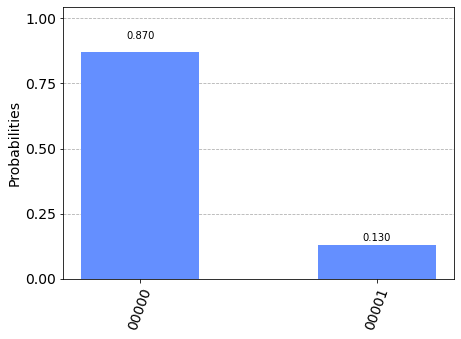

In [ ]:
plot_histogram(counts)

# Adding further more measurements or intermediate disturbances

In [ ]:
qreg_q = QuantumRegister(11, 'q')
creg_c = ClassicalRegister(11, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[4])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[5])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[6])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[7])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[8])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[9])
circuit.u3(pi/20, -pi/2, pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[10])
circuit.measure(qreg_q[0], creg_c[0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00000 and 00001 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00000 and 00001 are: {'00000000000': 9371, '00000000001': 629}


┌──────────────────────┐     ┌──────────────────────┐     »
 q_0: ┤ U3(pi/20,-pi/2,pi/2) ├──■──┤ U3(pi/20,-pi/2,pi/2) ├──■──»
      └──────────────────────┘┌─┴─┐└──────────────────────┘  │  »
 q_1: ────────────────────────┤ X ├──────────────────────────┼──»
                              └───┘                        ┌─┴─┐»
 q_2: ─────────────────────────────────────────────────────┤ X ├»
                                                           └───┘»
 q_3: ──────────────────────────────────────────────────────────»
                                                                »
 q_4: ──────────────────────────────────────────────────────────»
                                                                »
 q_5: ──────────────────────────────────────────────────────────»
                                                                »
 q_6: ──────────────────────────────────────────────────────────»
                                                                »
 q_7: ──────────────────────────────────────────────────────────»
                                                                »
 q_8: ──────────────────────────────────────────────────────────»
                                                                »
 q_9: ──────────────────────────────────────────────────────────»
                                                                »
q_10: ──────────────────────────────────────────────────────────»
                                                                »
c: 11/══════════════════════════════════════════════════════════»
                                                                »
«      ┌──────────────────────┐     ┌──────────────────────┐     »
« q_0: ┤ U3(pi/20,-pi/2,pi/2) ├──■──┤ U3(pi/20,-pi/2,pi/2) ├──■──»
«      └──────────────────────┘  │  └──────────────────────┘  │  »
« q_1: ──────────────────────────┼────────────────────────────┼──»
«                                │                            │  »
« q_2: ──────────────────────────┼────────────────────────────┼──»
«                              ┌─┴─┐                          │  »
« q_3: ────────────────────────┤ X ├──────────────────────────┼──»
«                              └───┘                        ┌─┴─┐»
« q_4: ─────────────────────────────────────────────────────┤ X ├»
«                                                           └───┘»
« q_5: ──────────────────────────────────────────────────────────»
«                                                                »
« q_6: ──────────────────────────────────────────────────────────»
«                                                                »
« q_7: ──────────────────────────────────────────────────────────»
«                                                                »
« q_8: ──────────────────────────────────────────────────────────»
«                                                                »
« q_9: ──────────────────────────────────────────────────────────»
«                                                                »
«q_10: ──────────────────────────────────────────────────────────»
«                                                                »
«c: 11/══════════════════════════════════════════════════════════»
«                                                                »
«      ┌──────────────────────┐     ┌──────────────────────┐     »
« q_0: ┤ U3(pi/20,-pi/2,pi/2) ├──■──┤ U3(pi/20,-pi/2,pi/2) ├──■──»
«      └──────────────────────┘  │  └──────────────────────┘  │  »
« q_1: ──────────────────────────┼────────────────────────────┼──»
«                                │                            │  »
« q_2: ──────────────────────────┼────────────────────────────┼──»
«                                │                            │  »
« q_3: ──────────────────────────┼────────────────────────────┼──»
«                                │                            │  »
« q_4: ──────────────────────────┼────────────────────────────┼──»
«          

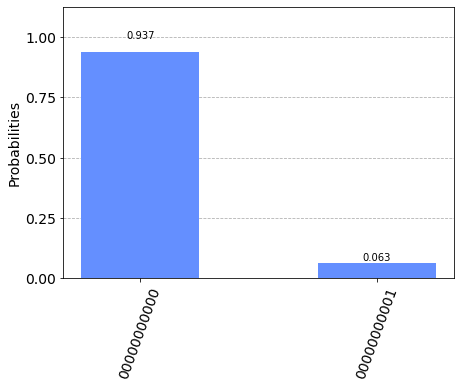

In [ ]:
plot_histogram(counts)

Let n be the number of intemediate measurements. from above histogram we can assume the higher n leads to higher survivial probability which means low chance of changing the intial state.

# Quantum Bomb Test


Avshalom Elitzur and Lev Vaidman came up with this thought experiment to solve a problem which can test photon sensitive bombs without exploding them using interaction free measurement.They have used Mach-Zehner interferometer which consist of a light source, two beam splitters, two mirrors and two detectors.
When light source emits light the beam splitter splits the light toward mirrors which reflect toward second beam splitter the setup is in such a way where the both light beams constructively interfere and detected by dectector A, detector B is left in dark as shown below.

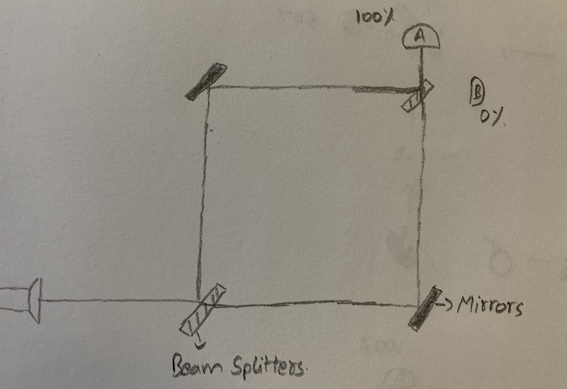

When we slowed down the light beam down so much that only single photon is emitted at a time. Classical physics states that there is equal probability that both the detectors will detect the light as there are no two photons to interfere at second beam splitter as shown below.

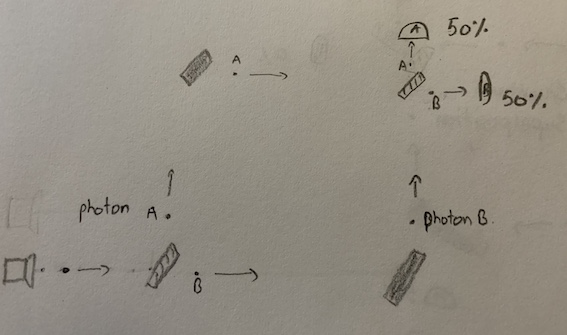



But the results showed that all the photons were detected by detector A, not a single photon is detected by detector B.why? because photon is interfering with itself so the photon takes both paths and interfers with itself at second beam splitter as shown below


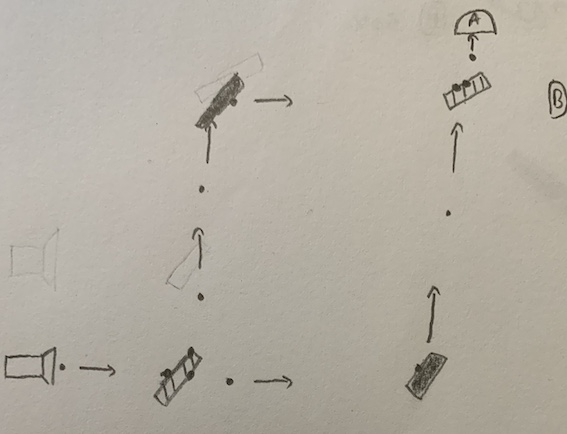


Are the detectors a form of measurement? well detectors only able to detect the light after light hits second beam splitter. No matter what path(Horizontal or vertical) the photon takes there is equal amount of probability that both the detectors can detect the light.So detectors tell us nothing about which path the photon took. This not knowing is what allows the photons to undergo quantum superposition.
Now place a dud bomb in the lower path of photon Classical physics suggests irrespective of what path photon takes there is till 50-50 chance that detectors will detect the light from persepctive of photon nothing changed it doesnt involve with bomb any way and the detectors still didnt tell us which path the photon took.


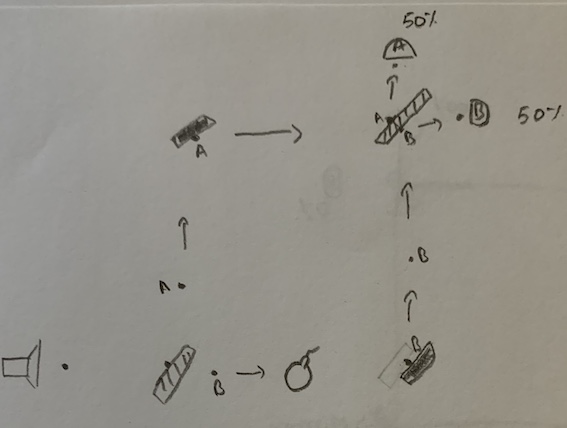

so the photon is still meets the requirements for quantum superposition.What actually happens is the photons takes both paths interfers at second beam splitter and show up in detector A. So if bomb is dud photon will show up on detector A.


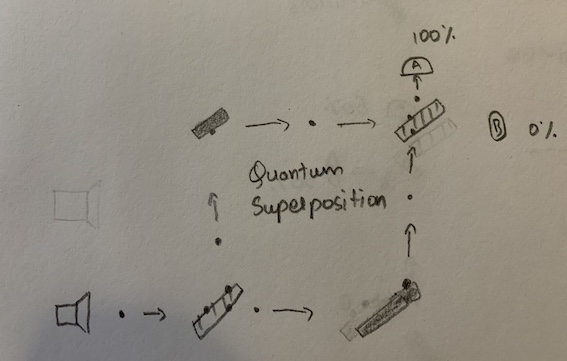


Imagine we place a live bomb in the lower path if the photon took lower path, bomb explodes and no photon is detected at both the detectors if the photon took upper path there is equal chance that photon will be detected at both the detectors. now detectors are telling us the path photon took. so the photon is no longer in superposition.

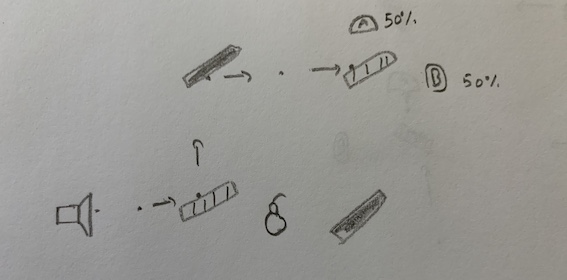

When we test a bomb

50% of the time the photon is undetected which means bomb is live and exploded.

25% of the time photon is detected on detetctor A which means the bomb could be live or dud experiment needed to be repeated

25% of the time photon is detected on detector B the bomb is live and we have detected without an explosion.


# Gates used in this experiment

The beam splitter BS1 and beam splitter BS2  are defined by U3 operation. The mirrors M1 and M2 are composed of sequential operation of X, Y, Z and X gates.The operations for the effect of bomb part are U3, H, S†,T†,U3†,S and T.
 
 We take three qubits, q0, q1 and q2, where the first two qubits (q0 and q1) represent the state of the photon and the third qubit, q2 signifies whether the bomb is there or not. if the state of the first two qubits is |10⟩, it denotes horizontal direction of the photon, if the state is |00⟩, it denotes the vertical direction of the photon. In a similar way, the X gate on the qubit q2 decides whether the bomb is alive or dead, i.e., the presence or absence of bomb. Here the absence of an active bomb is shown by |0⟩ state and the pres- ence of an active bomb by |1⟩ state. Beam splitters are the U3 gate with the parameters θ, φ and λ as π/2, π/2 and -π/2 respectively. The mirrors M1 and M2 combinedly consist of the Y, X, Z, X gates and controlled-U3 on the qubit q0, controlled-H, S†, H, T† on the qubit q1, controlled-H on the qubit q0 then a controlled-not-controlled on the qubit q1, controlled-U3† on the qubit q0 and T, H, S on the qubit q1 which acts as the effect of bomb.

# **CASE-1 :No BOMB or Dead BOMB**
**The direction of input photon in veritcal direction**

The input photon is from vertical direction, which is taken to be |00⟩ state. Initially, as there is no bomb, the state of the whole system is given as |000⟩. On passing the photon through BS1, M1,M2 and BS2 the state of the photon at the end is found to be |00⟩ state, which means it will be detected at the detector D1.

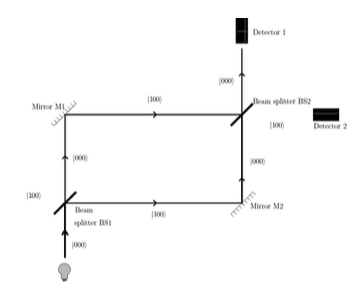



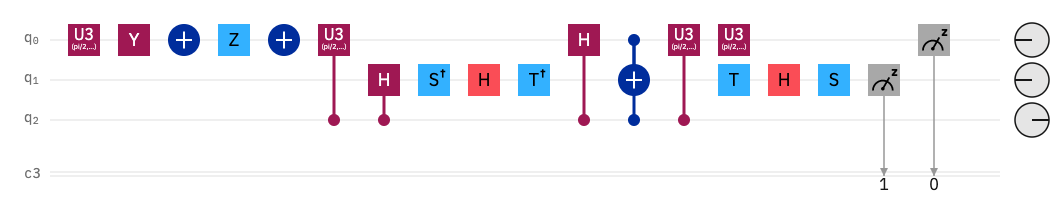

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.y(qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.cu3(pi/2, pi/2, -pi/2, qreg_q[2], qreg_q[0])
circuit.ch(qreg_q[2], qreg_q[1])
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.tdg(qreg_q[1])
circuit.ch(qreg_q[2], qreg_q[0])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[1])
circuit.cu3(pi/2, -pi/2, pi/2, qreg_q[2], qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.t(qreg_q[1])
circuit.h(qreg_q[1])
circuit.s(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)

# Draw the circuit
circuit.draw()

┌─────────────────────┐┌───┐┌───┐┌───┐┌───┐┌─────────────────────┐     »
q_0: ┤ U3(pi/2,pi/2,-pi/2) ├┤ Y ├┤ X ├┤ Z ├┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├─────»
     └─────────────────────┘└───┘└───┘└───┘└───┘└──────────┬──────────┘┌───┐»
q_1: ──────────────────────────────────────────────────────┼───────────┤ H ├»
                                                           │           └─┬─┘»
q_2: ──────────────────────────────────────────────────────■─────────────■──»
                                                                            »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«            ┌───┐                 ┌─────────────────────┐»
«q_0: ───────┤ H ├──────────────■──┤ U3(pi/2,-pi/2,pi/2) ├»
«     ┌─────┐└─┬─┘┌───┐┌─────┐┌─┴─┐└──────────┬──────────┘»
«q_1: ┤ SDG ├──┼──┤ H ├┤ TDG ├┤ X ├───────────┼───────────»
«     └─────┘  │  └───┘└─────┘└─┬─┘           │           »
«q_2: ─────────■────────────────■─────────────■───────────»
«                                                         »
«c: 3/════════════════════════════════════════════════════»
«                                                         »
«     ┌─────────────────────┐          ┌─┐   
«q_0: ┤ U3(pi/2,pi/2,-pi/2) ├──────────┤M├───
«     └────────┬───┬────────┘┌───┐┌───┐└╥┘┌─┐
«q_1: ─────────┤ T ├─────────┤ H ├┤ S ├─╫─┤M├
«              └───┘         └───┘└───┘ ║ └╥┘
«q_2: ──────────────────────────────────╫──╫─
«                                       ║  ║ 
«c: 3/══════════════════════════════════╩══╩═
«                                       0  1

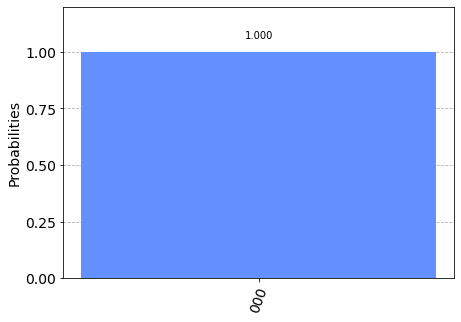

In [ ]:
plot_histogram(counts)

# When direction of input photon is horizontal

The input of photon is from horizontal direction is taken to be|10⟩. As the photon is in the horizontal direction and the bomb is dead, the state of the whole system is given as |100⟩. On passing the photon through BS1,M1,M2,BS2 The final state of the photon is calculated to be |10⟩, which implies the photon will be detected at the detector D2.

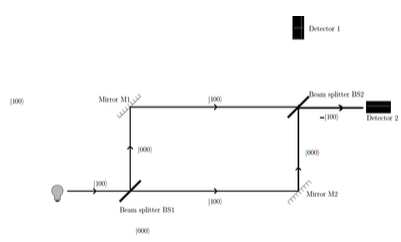

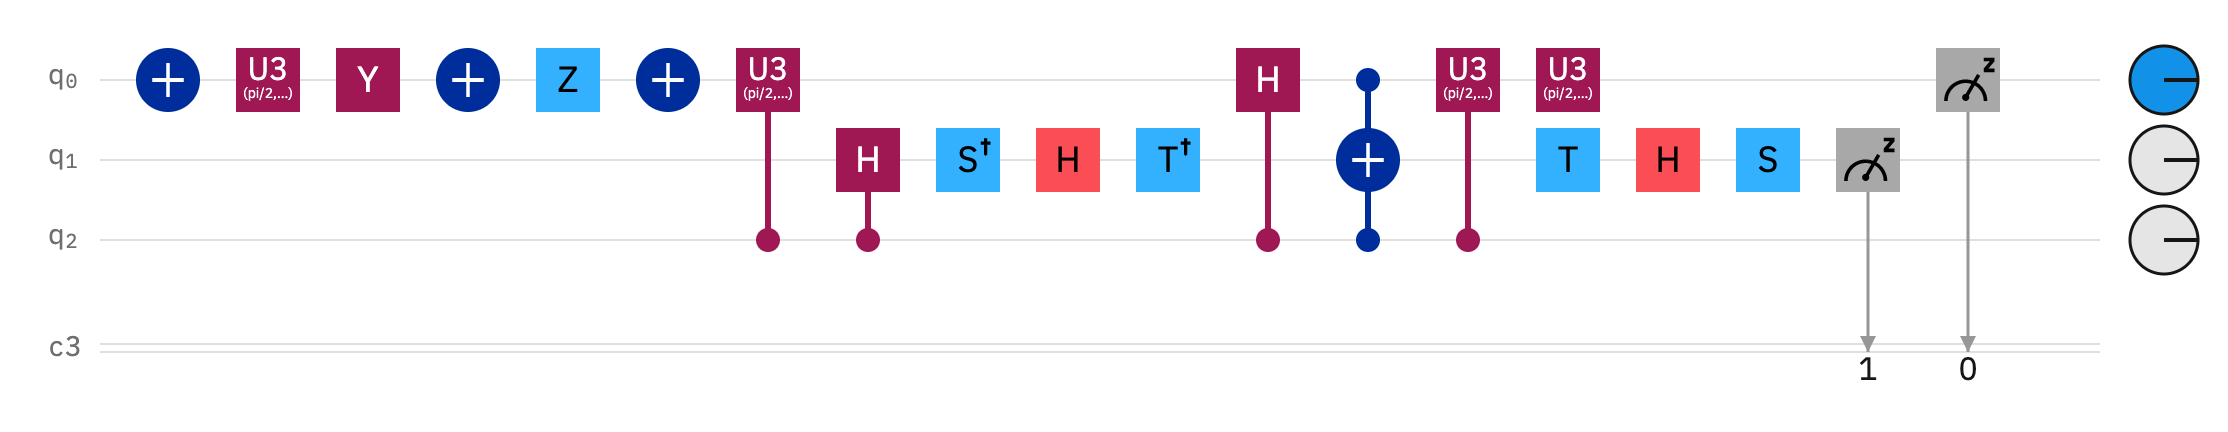

In [ ]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.y(qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.cu3(pi/2, pi/2, -pi/2, qreg_q[2], qreg_q[0])
circuit.ch(qreg_q[2], qreg_q[1])
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.tdg(qreg_q[1])
circuit.ch(qreg_q[2], qreg_q[0])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[1])
circuit.cu3(pi/2, -pi/2, pi/2, qreg_q[2], qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.t(qreg_q[1])
circuit.h(qreg_q[1])
circuit.s(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)

# Draw the circuit
circuit.draw()

┌───┐┌─────────────────────┐┌───┐┌───┐┌───┐┌───┐┌─────────────────────┐»
q_0: ┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├┤ Y ├┤ X ├┤ Z ├┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├»
     └───┘└─────────────────────┘└───┘└───┘└───┘└───┘└──────────┬──────────┘»
q_1: ───────────────────────────────────────────────────────────┼───────────»
                                                                │           »
q_2: ───────────────────────────────────────────────────────────■───────────»
                                                                            »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                 ┌───┐                 ┌─────────────────────┐»
«q_0: ────────────┤ H ├──────────────■──┤ U3(pi/2,-pi/2,pi/2) ├»
«     ┌───┐┌─────┐└─┬─┘┌───┐┌─────┐┌─┴─┐└──────────┬──────────┘»
«q_1: ┤ H ├┤ SDG ├──┼──┤ H ├┤ TDG ├┤ X ├───────────┼───────────»
«     └─┬─┘└─────┘  │  └───┘└─────┘└─┬─┘           │           »
«q_2: ──■───────────■────────────────■─────────────■───────────»
«                                                              »
«c: 3/═════════════════════════════════════════════════════════»
«                                                              »
«     ┌─────────────────────┐          ┌─┐   
«q_0: ┤ U3(pi/2,pi/2,-pi/2) ├──────────┤M├───
«     └────────┬───┬────────┘┌───┐┌───┐└╥┘┌─┐
«q_1: ─────────┤ T ├─────────┤ H ├┤ S ├─╫─┤M├
«              └───┘         └───┘└───┘ ║ └╥┘
«q_2: ──────────────────────────────────╫──╫─
«                                       ║  ║ 
«c: 3/══════════════════════════════════╩══╩═
«                                       0  1

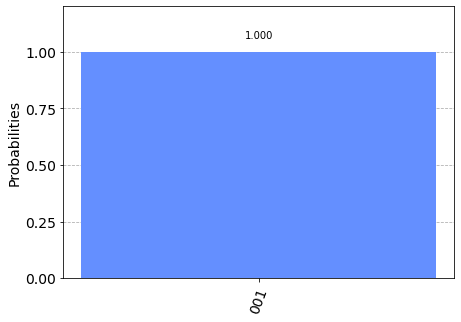

In [ ]:
plot_histogram(counts)

# **CASE-2: WHEN BOMB IS THERE**
**When the input photon is from vertical direction**

The input of photon is from vertical direction the state is taken to be |00⟩. As the bomb is there and the photon is from ver-
tical direction, the state of the whole system is |001⟩.
On passing the photon through BS1,M1,M2,BS2 the final state of the photon is the superposition of |00⟩, |01⟩ and |10⟩ with probabilities 0.25, 0.25 and 0.5 respectively, which represent the detection of photon at the detectors D1, D2 with 0.25 and 0.25 probabilities. It is observed that the photon with 0.5 probability, is not detected anywhere, which is denoted by the state |10⟩ state.

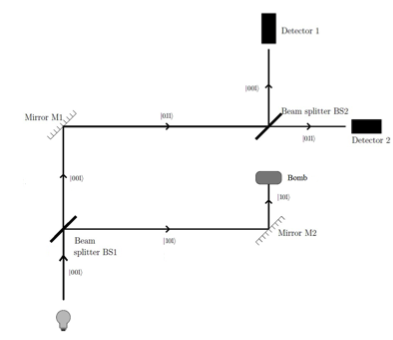

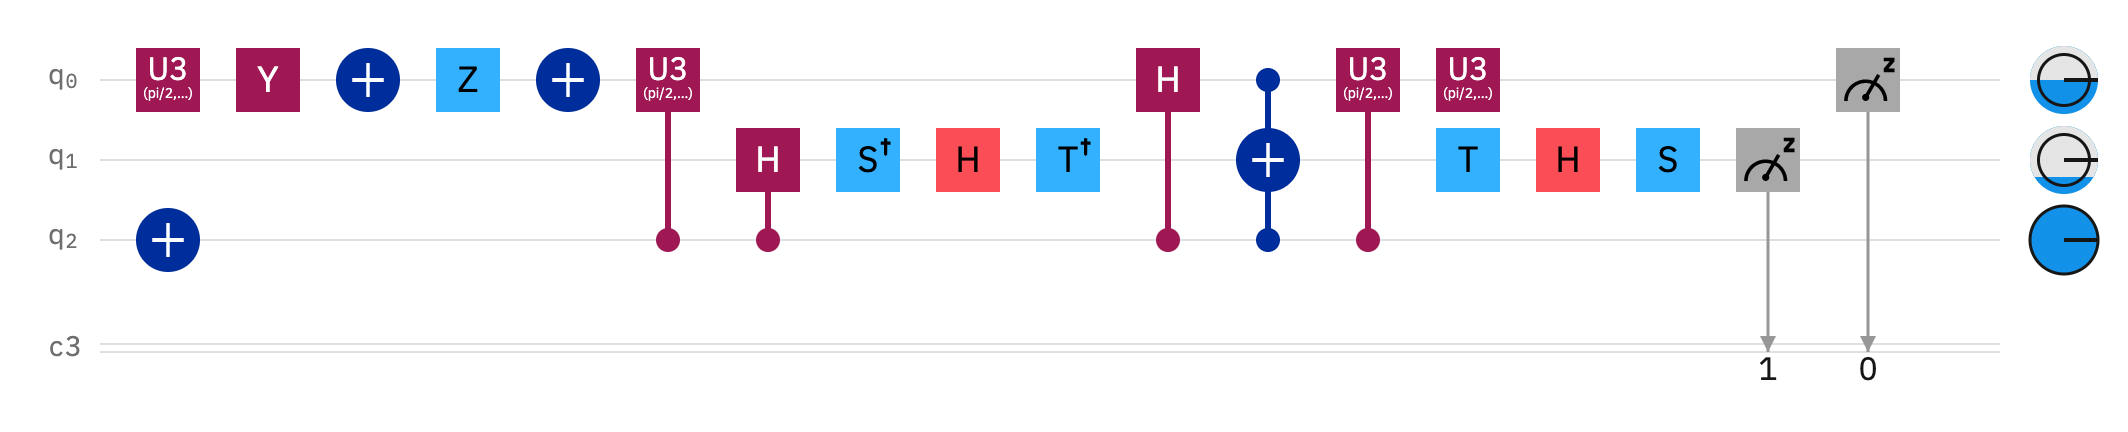

In [ ]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.y(qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.cu3(pi/2, pi/2, -pi/2, qreg_q[2], qreg_q[0])
circuit.ch(qreg_q[2], qreg_q[1])
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.tdg(qreg_q[1])
circuit.ch(qreg_q[2], qreg_q[0])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[1])
circuit.cu3(pi/2, -pi/2, pi/2, qreg_q[2], qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.t(qreg_q[1])
circuit.h(qreg_q[1])
circuit.s(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)

# Draw the circuit
circuit.draw()

┌─────────────────────┐┌───┐┌───┐┌───┐┌───┐┌─────────────────────┐     »
q_0: ┤ U3(pi/2,pi/2,-pi/2) ├┤ Y ├┤ X ├┤ Z ├┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├─────»
     └─────────────────────┘└───┘└───┘└───┘└───┘└──────────┬──────────┘┌───┐»
q_1: ──────────────────────────────────────────────────────┼───────────┤ H ├»
              ┌───┐                                        │           └─┬─┘»
q_2: ─────────┤ X ├────────────────────────────────────────■─────────────■──»
              └───┘                                                         »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«            ┌───┐                 ┌─────────────────────┐»
«q_0: ───────┤ H ├──────────────■──┤ U3(pi/2,-pi/2,pi/2) ├»
«     ┌─────┐└─┬─┘┌───┐┌─────┐┌─┴─┐└──────────┬──────────┘»
«q_1: ┤ SDG ├──┼──┤ H ├┤ TDG ├┤ X ├───────────┼───────────»
«     └─────┘  │  └───┘└─────┘└─┬─┘           │           »
«q_2: ─────────■────────────────■─────────────■───────────»
«                                                         »
«c: 3/════════════════════════════════════════════════════»
«                                                         »
«     ┌─────────────────────┐          ┌─┐   
«q_0: ┤ U3(pi/2,pi/2,-pi/2) ├──────────┤M├───
«     └────────┬───┬────────┘┌───┐┌───┐└╥┘┌─┐
«q_1: ─────────┤ T ├─────────┤ H ├┤ S ├─╫─┤M├
«              └───┘         └───┘└───┘ ║ └╥┘
«q_2: ──────────────────────────────────╫──╫─
«                                       ║  ║ 
«c: 3/══════════════════════════════════╩══╩═
«                                       0  1

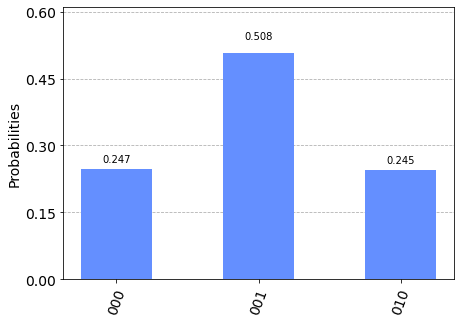

In [ ]:
plot_histogram(counts)

# When the input photon is from horizontal direction

The input of photon is taken to be |10⟩ state and due to the presence of bomb, the state of the whole system is |101⟩. On passing the photon through BS1,M1,M2,BS2.the probabilities of |00⟩, |01⟩ and |10⟩ are 0.25, 0.25 and 0.5 respectively. The outcomes|00⟩ and |01⟩ with each 0.25 probability represent the detection of the photon at the two detectors D1 and D2. The outcome |10⟩ with 0.5 probability means the bomb will explode in 50 % of the cases.

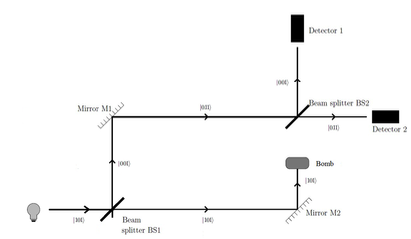


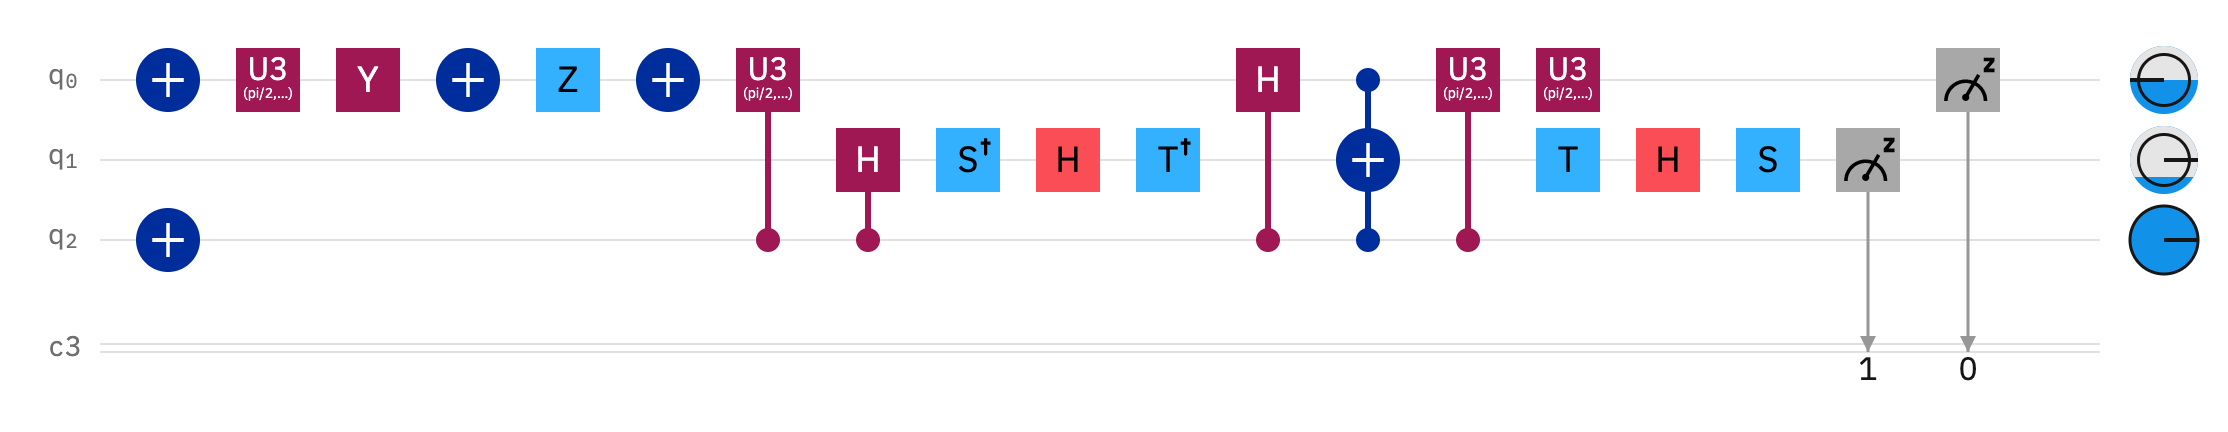

In [ ]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.x(qreg_q[2])
circuit.y(qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.cu3(pi/2, pi/2, -pi/2, qreg_q[2], qreg_q[0])
circuit.ch(qreg_q[2], qreg_q[1])
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.tdg(qreg_q[1])
circuit.ch(qreg_q[2], qreg_q[0])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[1])
circuit.cu3(pi/2, -pi/2, pi/2, qreg_q[2], qreg_q[0])
circuit.u3(pi/2, pi/2, -pi/2, qreg_q[0])
circuit.t(qreg_q[1])
circuit.h(qreg_q[1])
circuit.s(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)

# Draw the circuit
circuit.draw()

┌───┐┌─────────────────────┐┌───┐┌───┐┌───┐┌───┐┌─────────────────────┐»
q_0: ┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├┤ Y ├┤ X ├┤ Z ├┤ X ├┤ U3(pi/2,pi/2,-pi/2) ├»
     └───┘└─────────────────────┘└───┘└───┘└───┘└───┘└──────────┬──────────┘»
q_1: ───────────────────────────────────────────────────────────┼───────────»
     ┌───┐                                                      │           »
q_2: ┤ X ├──────────────────────────────────────────────────────■───────────»
     └───┘                                                                  »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                 ┌───┐                 ┌─────────────────────┐»
«q_0: ────────────┤ H ├──────────────■──┤ U3(pi/2,-pi/2,pi/2) ├»
«     ┌───┐┌─────┐└─┬─┘┌───┐┌─────┐┌─┴─┐└──────────┬──────────┘»
«q_1: ┤ H ├┤ SDG ├──┼──┤ H ├┤ TDG ├┤ X ├───────────┼───────────»
«     └─┬─┘└─────┘  │  └───┘└─────┘└─┬─┘           │           »
«q_2: ──■───────────■────────────────■─────────────■───────────»
«                                                              »
«c: 3/═════════════════════════════════════════════════════════»
«                                                              »
«     ┌─────────────────────┐          ┌─┐   
«q_0: ┤ U3(pi/2,pi/2,-pi/2) ├──────────┤M├───
«     └────────┬───┬────────┘┌───┐┌───┐└╥┘┌─┐
«q_1: ─────────┤ T ├─────────┤ H ├┤ S ├─╫─┤M├
«              └───┘         └───┘└───┘ ║ └╥┘
«q_2: ──────────────────────────────────╫──╫─
«                                       ║  ║ 
«c: 3/══════════════════════════════════╩══╩═
«                                       0  1

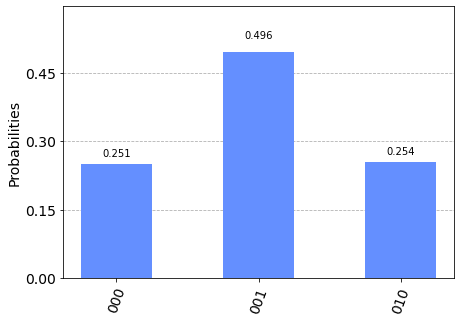

In [ ]:
plot_histogram(counts)

# **BIBLIOGRAPHY**
[1] Subhashish Barik, Dhiman Kumar Kalita et al 2020,'Demonstrating Quantum Zeno Effect on IBM Quantum Experience'< https://arxiv.org/abs/2008.01070 >

[2] Raj, Ankit & Das, Barnali & Behera, Bikash & Panigrahi, Prasanta. (2019). Demonstration of Bomb Detection Using the IBM Quantum Computer. 10.20944/preprints201902.0232.v1. 

< https://www.researchgate.net/publication/331530257_Demonstration_of_Bomb_Detection_Using_the_IBM_Quantum_Computer >

[3] https://www.youtube.com/watch?v=wiW7jhdKDVA&t=15s

[4] https://www.youtube.com/watch?v=V34XByHUx10

[5] https://ocw.mit.edu/courses/physics/8-04-quantum-physics-i-spring-2016/video-lectures/part-1/elitzur-vaidman-bombs/

[6] Physics.org, washington university 2017, <https://phys.org/news/2017-06-quantum-zeno-effect-impacts-schroedinger.html>

[7] https://riliu.math.ncsu.edu/437/notes3se5.html

[8] University of Queensland,'Introduction to the quantum Zeno effect'. 

<https://espace.library.uq.edu.au/data/UQ_157843/n03chapter2.pdf?Expires=1600913220&Key-Pair-Id=APKAJKNBJ4MJBJNC6NLQ&Signature=SaficrvVCIl1Ljih8c3lHXUe2CzuuN9PPIOmOR0EmXGv9I~5G80NZZYTmPV39Sly4dKjkU8tz6Di9OYLngy3F49S8slE9GM9GDiXvyhrT-KM3aB52qYK3-WXKnpMKqrQTVOzGiq4xIbbdg~OEZqI2vlm6A8BZxtjp-syRy6lVwqlZw0x5MzgiP3xLm-vU~CHltoD28UzwEMedktSRNau57-p5-Wo4lzbjy1PRJjdyWmKvHDbRi8XqkPckBknjrkfTdm-IEStIMOwIkx05I4ilXhxuBz~uWhacvo1~6qy1e2EveHWe2XKeR2d8X-qw-TiYJoEQD0mf4bvy72fpg4p7Q__>

[9] (L.2.3-L.2.4),https://ocw.mit.edu/courses/physics/8-04-quantum-physics-i-spring-2016/video-lectures/part-1/